In [145]:
import pandas as pd
stock = pd.read_csv('/content/q4.csv')
data=stock

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [146]:
data=pd.DataFrame(data)
data=data.rename(columns={"Date": "X", "Value": "Y"})


**4.a Using the complete dataset, perform simple linear regression (time vs. stock price, including β0 term), plot the original data and the regression fit, and report the SSE.**

In [147]:
time = []
temp = 1
for i in range(len(data)):
    if i>1:
      time.append(temp)
      d=pd.Timestamp(data.values[i][0])-pd.Timestamp(data.values[i-1][0])
      temp += d.days
    else:
      time.append(temp)
      temp += 1


In [150]:
data['X'] = time

3575.0

In [ ]:
data1 = np.array_split(data, 1)

In [ ]:
def compute_B0_B1(X, Y):
    B0 = 0
    B1 = 1

    XY = np.sum(X * Y)
    X_2 = np.sum(X * X)
    X_mean = np.mean(X)
    Y_mean = np.mean(Y)

    B1 = (XY - (len(X) * X_mean * Y_mean)) / (X_2 - (len(X) * X_mean * X_mean))
    B0 = Y_mean - (B1 * X_mean)

    return B0, B1

In [ ]:
b0_b1 = []
a, b = compute_B0_B1(data1[0]['X'], data1[0]['Y'])
b0_b1.append((a, b))

In [ ]:
b0_b1

[(-444.59142184359234, 0.9316331559814438)]

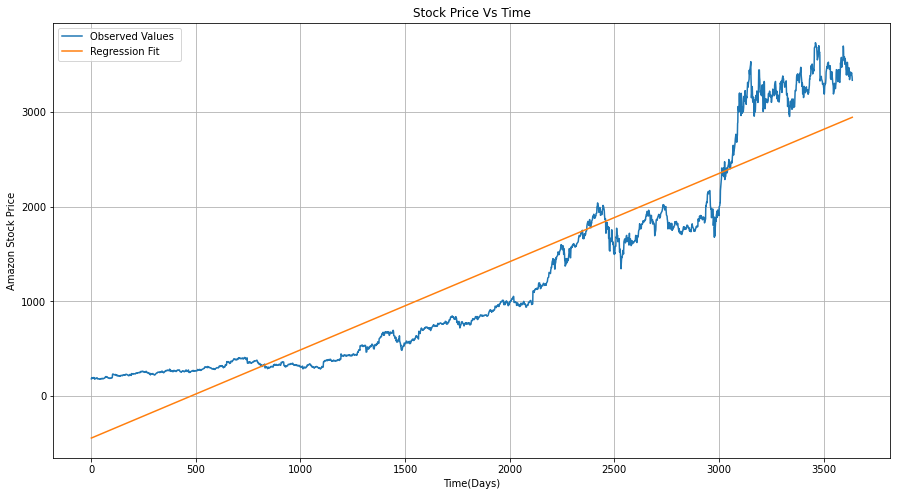

SSE for Data : 376136961.7729423


In [167]:
temp = b0_b1[0][0] + (b0_b1[0][1] * data1[0]['X'])
data1[0]['YPred'] = temp

plt.figure(figsize=(15, 8))
plt.plot(data1[0]['X'].values, data1[0]['Y'].values, label = "Original data points for partition ");
plt.plot(data1[0]['X'].values, data1[0]['YPred'].values)
plt.ylabel("Amazon Stock Price")
plt.xlabel('Time(Days)')
plt.title("Stock Price Vs Time")
plt.gca().legend(('Observed Values ', 'Regression Fit'))
plt.grid()
plt.show()


sse1 = np.sum(np.square(data1[0]['Y'] - data1[0]['YPred']))
print("SSE for Data " + ": " + str(sse1))

In [169]:
print("SSE for Data " + ": " + str(sse1))

SSE for Data : 376136961.7729423


**4.b Using the data from 17 Jan 2012 to 31 Jan 2020, predict the stock price on 1st November 2021 using simple linear regression. How much is the percentage difference between the prediction and the real value? Show the prediction result and the SSE. Plot the original data and the regression fit.**

In [152]:
stock["Date"]=pd.to_datetime(stock['Date'])
stock

,Date,Value
0,2012-01-17,181.660004
1,2012-01-18,189.440002
2,2012-01-19,194.449997
3,2012-01-20,190.929993
4,2012-01-23,186.089996
...,...,...
2503,2021-12-27,3393.389893
2504,2021-12-28,3413.219971
2505,2021-12-29,3384.020020
2506,2021-12-30,3372.889893


In [153]:
filter_date = ((stock['Date']>='2012-01-17') & (stock['Date']<='2020-1-31'))

stock_fiter=pd.DataFrame(stock.loc[filter_date])
stock_fiter

,Date,Value
0,2012-01-17,181.660004
1,2012-01-18,189.440002
2,2012-01-19,194.449997
3,2012-01-20,190.929993
4,2012-01-23,186.089996
...,...,...
2019,2020-01-27,1828.339966
2020,2020-01-28,1853.250000
2021,2020-01-29,1858.000000
2022,2020-01-30,1870.680054


In [154]:
data_filter1=pd.DataFrame(stock_fiter)
data_filter1=data_filter1.rename(columns={"Date": "X", "Value": "Y"})

In [155]:
time = []
temp = 1
for i in range(len(stock_fiter)):
    if i>1:
      time.append(temp)
      d=pd.Timestamp(stock_fiter.values[i][0])-pd.Timestamp(stock_fiter.values[i-1][0])
      temp += d.days
    else:
      time.append(temp)
      temp += 1




In [156]:
data_filter1['X'] = time
tf=data_filter1
data_filter1

data_filter1

,X,Y
0,1,181.660004
1,2,189.440002
2,3,194.449997
3,4,190.929993
4,5,186.089996
...,...,...
2019,2931,1828.339966
2020,2934,1853.250000
2021,2935,1858.000000
2022,2936,1870.680054


In [157]:
data_filter1 = np.array_split(data_filter1, 1)


In [158]:
b0_b1_4b = []
a, b = compute_B0_B1(data_filter1[0]['X'], data_filter1[0]['Y'])
b0_b1_4b.append((a, b))

In [159]:
b0_b1_4b

[(-138.07471269131986, 0.6508700748118723)]

In [160]:
stock.iloc[2465]

Date     2021-11-01 00:00:00
Value            3318.110107
Name: 2465, dtype: object

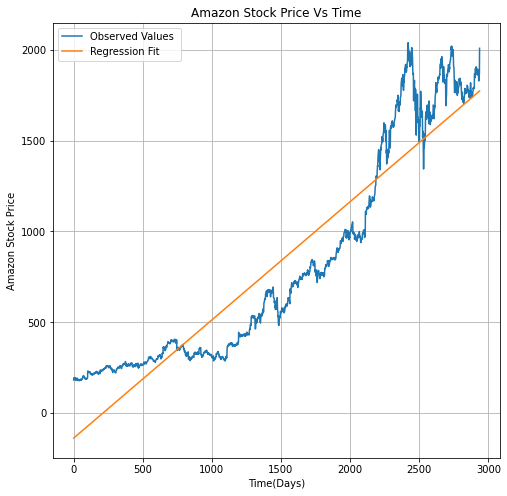

In [161]:
pred_Nov1st_2021 = b0_b1_4b[0][0] + (b0_b1_4b[0][1] * (data.iloc[2465].X))
temp1 = b0_b1_4b[0][0] + (b0_b1_4b[0][1] * data_filter1[0]['X'])

plt.figure(figsize=(8, 8))
plt.plot(data_filter1[0]['X'].values, data_filter1[0]['Y'].values, label = "Original data points for partition ");
plt.plot(data_filter1[0]['X'].values, temp1)
plt.ylabel("Amazon Stock Price")
plt.xlabel('Time(Days)')
plt.title("Amazon Stock Price Vs Time")
plt.gca().legend(('Observed Values ', 'Regression Fit'))
plt.grid()
plt.show()




In [162]:
actual_value_1st_nov_2021 = stock.loc[stock['Date']=='2021-11-1']

percent_diff = (abs(pred_Nov1st_2021-actual_value_1st_nov_2021.values[0][1])/actual_value_1st_nov_2021.values[0][1])*100
print("Percentage difference between true and predicted for 2021-11-1 : "+str(percent_diff)+" %")

print("The Predicted Stock Value  2021-11-1 : "+ str(pred_Nov1st_2021))

Percentage difference between true and predicted for 2021-11-1 : 34.03516658041017 %
The Predicted Stock Value  2021-11-1 : 2188.785804761124


In [163]:
sse_4b = np.sum(np.square(actual_value_1st_nov_2021.values[0][1] - pred_Nov1st_2021))
print("SSE for 2021-11-1 " + ": " + str(sse_4b))

SSE for 2021-11-1 : 1275373.3796273242


**4.c Let us see how the stock price will increase in the future considering the same factors will continue for 10 more years. Using only the data after Sept 2020, predict the stock price on 1st January 2031 using simple linear regression. Show the prediction result and SSE. Plot the original data and the regression fit. Add the regression fit from (b) into the same plot.**

In [126]:
filter_date = ((stock['Date']>='2020-9-1'))

stock_fiter2=stock.loc[filter_date]

In [127]:
data_filter2=pd.DataFrame(stock_fiter2)
data_filter2=data_filter2.rename(columns={"Date": "X", "Value": "Y"})

In [128]:
time = []
temp = 3151
for i in range(len(stock_fiter2)):
    if i>1:
      time.append(temp)
      d=pd.Timestamp(stock_fiter2.values[i][0])-pd.Timestamp(stock_fiter2.values[i-1][0])
      temp += d.days
    else:
      time.append(temp)
      temp += 1




In [129]:
data_filter2['X']=time

In [130]:
data_filter2 = np.array_split(data_filter2, 1)

In [131]:
b0_b1_4c = []
a, b = compute_B0_B1(data_filter2[0]['X'], data_filter2[0]['Y'])
b0_b1_4c.append((a, b))
b0_b1_4c

[(836.0049353486988, 0.7269567672457925)]

In [132]:
pred_Jan1st_2031 = b0_b1_4c[0][0] + (b0_b1_4c[0][1] * 6925)


print("The Predicted Stock Value  2031-01-1 : "+ str(pred_Jan1st_2031))

The Predicted Stock Value  2031-01-1 : 5870.180548525812


SSE for Data : 5512383.208922967


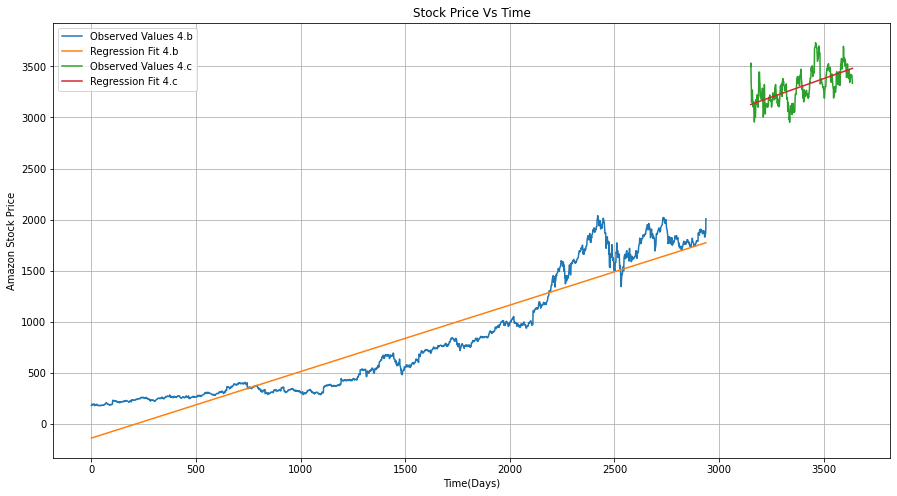

In [133]:
temp2 = b0_b1_4c[0][0] + (b0_b1_4c[0][1] * data_filter2[0]['X'])
sse = np.sum(np.square(data_filter2[0]['Y'] - temp2))
print("SSE for Data " + ": " + str(sse))
plt.figure(figsize=(15, 8))
plt.plot(data_filter1[0]['X'].values, data_filter1[0]['Y'].values, label = "Original data points for partition ");
plt.plot(data_filter1[0]['X'].values, temp1)
plt.plot(data_filter2[0]['X'].values, data_filter2[0]['Y'].values, label = "Original data points for partition ");
plt.plot(data_filter2[0]['X'].values, temp2)
plt.ylabel("Amazon Stock Price")
plt.xlabel('Time(Days)')
plt.title("Stock Price Vs Time")
plt.gca().legend(('Observed Values 4.b', 'Regression Fit 4.b','Observed Values 4.c', 'Regression Fit 4.c'))
plt.grid()
plt.show()


**4d. Using the data from Jan 2012 to Jan 2020, predict the stock price on 1st January 2031 using simple
linear regression. What is the percentage difference between the predictions in (c) and (d)?**

In [ ]:
filter_date = ((stock['Date']>='2012-01-01') & (stock['Date']<='2020-01-31'))

stock_fiter3=stock.loc[filter_date]
stock_fiter3

,Date,Value
0,2012-01-17,181.660004
1,2012-01-18,189.440002
2,2012-01-19,194.449997
3,2012-01-20,190.929993
4,2012-01-23,186.089996
...,...,...
2019,2020-01-27,1828.339966
2020,2020-01-28,1853.250000
2021,2020-01-29,1858.000000
2022,2020-01-30,1870.680054


In [ ]:
data_filter3=pd.DataFrame(stock_fiter3)
data_filter3=data_filter3.rename(columns={"Date": "X", "Value": "Y"})


In [ ]:
time = []
temp = 1
for i in range(len(stock_fiter3)):
    if i>1:
      time.append(temp)
      d=pd.Timestamp(stock_fiter3.values[i][0])-pd.Timestamp(stock_fiter3.values[i-1][0])
      temp += d.days
    else:
      time.append(temp)
      temp += 1




In [ ]:
data_filter3['X']=time

In [ ]:
data_filter3 = np.array_split(data_filter3, 1)


In [ ]:
b0_b1_4d = []
a, b = compute_B0_B1(data_filter3[0]['X'], data_filter3[0]['Y'])
b0_b1_4d.append((a, b))

In [ ]:
b0_b1_4d

[(-138.07471269131986, 0.6508700748118723)]

In [ ]:
pred_Jan1st_2026 = b0_b1_4d[0][0] + (b0_b1_4d[0][1] * 6925)


print("The Predicted Stock Value  2026-01-1 : "+ str(pred_Jan1st_2026))

The Predicted Stock Value  2026-01-1 : 4369.200555380896


In [ ]:
percent_diff2 = (abs(pred_Jan1st_2031-pred_Jan1st_2026)/pred_Jan1st_2031)*100

print("Percentage difference between 2031-01-1 and 2026-01-1 predicted values: "+str(percent_diff2)+" %")

Percentage difference between 2031-01-1 and 2026-01-1 predicted values: 25.569571169695276 %


**4(e) What is your inference from the results of (b), (c), and (d)?**

In C and D we predicted the stock price for the date 1st January 2031 with the help two different time frames(>Sept 2020 and Jan 2012 to Jan 2020 ). 
The percentage error of the predicted values from the above was around 26% due to varied time ranges used to predict the data.
The time range >September 2020 was more accurate when compared to Jan 2012 to Jan 2020 was because of the renect trend in the former range compared to the latter.

The SSE for b : 2021-11-1 is  1275373.3796273242 the large value is due to the non stationary data which enclosed different trends in the dataset.


